# Processamento dos dados



---


[documentação](https://scikit-learn.org/stable/index.html) <br>


---

>[Processamento dos dados](#scrollTo=QoBv84MIUa-h)

>>[1. Vamos começar por importar os packages e o dataset](#scrollTo=HO6jdFDmldaU)

>>[2. Vamos explorar o dataset](#scrollTo=2S0UrVDEf8E-)

>>[3. Vamos tratar os dados em falta](#scrollTo=BKzodGb8R7t9)

>>>[3.1.  Removemos as colunas com pouca informação](#scrollTo=rEuiN5R7Przw)

>>>[3.2.  Imputamos valores](#scrollTo=PEYghDvyQAdi)

>>>[3.3.  Removemos todas as linhas com elementos com valor em falta](#scrollTo=c4ZBqVliAQ0V)

>>[4. Vamos passar ao tratamento das variáveis categóricas](#scrollTo=Zr_lOzPEVUOS)

>>[5. Vamos por último escalar as variáveis](#scrollTo=7sdPNoqx9UYX)



## 1.&nbsp;Vamos começar por importar os packages e o dataset

In [2]:
# packages gerais
import pandas as pd
import numpy as np

# vamos importar o dataset do titanic
df = pd.read_csv("C:/Users/yfreitas/Documents/pythonSamples/Machine Learning/Files/titanic.csv")

## 2.&nbsp;Vamos explorar o dataset

In [3]:
# vamos avaliar os dados em falta
df.isna().sum()
df[df.isna().sum(axis = 1) > 1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [4]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
# exploração inicial
# df.head()
# df.info()
df.shape
# df.describe()

(891, 12)

## 3.&nbsp;Vamos tratar os dados em falta

### 3.1.&nbsp; Removemos as colunas com pouca informação

In [6]:
# fazemos um simples drop
df_cleaned = df.drop('Cabin', axis=1)

### 3.2.&nbsp; Imputamos valores

<Axes: >

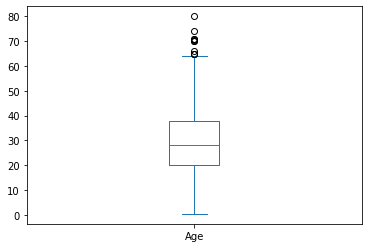

In [7]:
df.Age.plot(kind='box')

In [8]:
# vamos importar o modelo de impute
from sklearn.impute import SimpleImputer
si = SimpleImputer(strategy = 'median')
df_cleaned['Age'] = si.fit_transform(df_cleaned[['Age']])

In [9]:
# vamos ver o dataframe final
df_cleaned.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


In [10]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### 3.3.&nbsp; Removemos todas as linhas com elementos com valor em falta

In [10]:
# vamos fazer dropna para remover os 2 casos que faltam
df_cleaned.dropna(inplace = True)

In [11]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


## 4.&nbsp;Vamos passar ao tratamento das variáveis categóricas

In [12]:
# vamos primeiro examinar o conteúdo das variáveis
df_cleaned.select_dtypes(include='object')

,Name,Sex,Ticket,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,S
4,"Allen, Mr. William Henry",male,373450,S
...,...,...,...,...
886,"Montvila, Rev. Juozas",male,211536,S
887,"Graham, Miss. Margaret Edith",female,112053,S
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,S
889,"Behr, Mr. Karl Howell",male,111369,C


In [13]:
# vamos remover o nome e o bilhete
df_cleaned.drop(['Name', 'Ticket'], inplace=True, axis=1)

In [14]:
df_cleaned.select_dtypes(include='object')

,Sex,Embarked
0,male,S
1,female,C
2,female,S
3,female,S
4,male,S
...,...,...
886,male,S
887,female,S
888,female,S
889,male,C


In [15]:
# vamos importar o package
from sklearn.preprocessing import OneHotEncoder

# vamos criar a lista de colunas a passar ao modelo
ohe_list = df_cleaned.select_dtypes(include='object').columns.to_list()

# One-Hot Encoding
ohe = OneHotEncoder(sparse_output=False, drop='first')
ohe.fit_transform(df_cleaned[ohe_list]) # entrega em array
ohe.get_feature_names_out()

# vamos criar um df
df_ohe = pd.DataFrame(
    data=ohe.transform(df_cleaned[ohe_list]),
    columns=ohe.get_feature_names_out()
)

# vamos juntar tudo
df_cleaned = pd.concat([df_cleaned.reset_index(drop = True), df_ohe.reset_index(drop = True)], axis = 1)
df_cleaned.drop(ohe_list, inplace=True, axis=1)

In [16]:
df_cleaned

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,1.0,0.0,1.0
1,2,1,1,38.0,1,0,71.2833,0.0,0.0,0.0
2,3,1,3,26.0,0,0,7.9250,0.0,0.0,1.0
3,4,1,1,35.0,1,0,53.1000,0.0,0.0,1.0
4,5,0,3,35.0,0,0,8.0500,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
884,887,0,2,27.0,0,0,13.0000,1.0,0.0,1.0
885,888,1,1,19.0,0,0,30.0000,0.0,0.0,1.0
886,889,0,3,28.0,1,2,23.4500,0.0,0.0,1.0
887,890,1,1,26.0,0,0,30.0000,1.0,0.0,0.0


## 5.&nbsp;Vamos por último escalar as variáveis

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Fare'}>]], dtype=object)

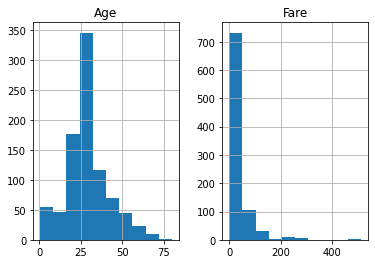

In [17]:
df_cleaned[['Age', 'Fare']].hist()

In [18]:
# vamos importar o package
from sklearn.preprocessing import StandardScaler, PowerTransformer

# vamos utilizar o StandardScaler na idade
std_scaler = StandardScaler()
df_cleaned['Age'] = std_scaler.fit_transform(df_cleaned[['Age']]) # entrega em array

# vamos usar a transformação de yeo-johnson na tarifa
pow_scaler = PowerTransformer()
df_cleaned['Fare'] = pow_scaler.fit_transform(df_cleaned[['Fare']]) # entrega em array

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Fare'}>]], dtype=object)

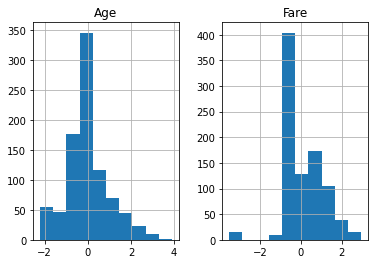

In [19]:
df_cleaned[['Age', 'Fare']].hist()

In [20]:
df_cleaned


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,-0.563674,1,0,-0.876580,1.0,0.0,1.0
1,2,1,1,0.669217,1,0,1.341242,0.0,0.0,0.0
2,3,1,3,-0.255451,0,0,-0.787660,0.0,0.0,1.0
3,4,1,1,0.438050,1,0,1.071865,0.0,0.0,1.0
4,5,0,3,0.438050,0,0,-0.772006,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
884,887,0,2,-0.178396,0,0,-0.291687,1.0,0.0,1.0
885,888,1,1,-0.794841,0,0,0.532081,0.0,0.0,1.0
886,889,0,3,-0.101340,1,2,0.292836,0.0,0.0,1.0
887,890,1,1,-0.255451,0,0,0.532081,1.0,0.0,0.0
